In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

In [35]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [36]:
# Step 1: Data Collection and Preprocessing
!wget https://raw.githubusercontent.com/Mr-ut/CL653-AI-ML/main/drilling_parameters.csv
df = pd.read_csv('drilling_parameters.csv')


--2024-04-25 17:45:27--  https://raw.githubusercontent.com/Mr-ut/CL653-AI-ML/main/drilling_parameters.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110413 (108K) [text/plain]
Saving to: ‘drilling_parameters.csv.7’

drilling_parameters 100%[===================>] 107.83K  --.-KB/s    in 0.02s   

2024-04-25 17:45:27 (5.13 MB/s) - ‘drilling_parameters.csv.7’ saved [110413/110413]



In [37]:
df.head()

,Bit Size (in),Mud Circulation Rate (gal/min),Drilling Interval Length (ft),Weight on Bit (1000 lbs),Rotary Speed (rev/min),ROP
0,6.268226,6.755652,9.204493,0.828297,18.445712,2.423891
1,5.954994,7.718057,21.518628,0.972434,20.234307,2.450550
2,6.413313,8.294527,31.393549,1.066859,20.615958,2.171108
3,6.924875,8.829501,44.537006,1.359604,21.761780,2.546448
4,5.991146,11.160353,47.956724,1.277136,18.561485,2.834607


In [38]:
df.describe()

,Bit Size (in),Mud Circulation Rate (gal/min),Drilling Interval Length (ft),Weight on Bit (1000 lbs),Rotary Speed (rev/min),ROP
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.063633,570.810872,6014.006566,27.960714,165.102210,19.794571
std,8.987129,331.291606,3523.018107,15.816684,86.131752,10.198543
min,5.289996,6.755652,9.204493,0.828297,16.454449,2.171108
25%,13.481018,284.889039,3003.727829,14.688134,92.021543,11.016647
50%,20.622934,568.287033,5898.423719,27.449973,165.278994,19.581043
75%,28.654389,846.119517,8900.869721,40.781526,236.541689,28.006170
max,41.719838,1388.509011,14551.031745,69.423078,397.384556,43.275513


In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop rows with missing values if necessary
df.dropna(inplace=True)

Missing Values:
Bit Size (in)                     0
Mud Circulation Rate (gal/min)    0
Drilling Interval Length (ft)     0
Weight on Bit (1000 lbs)          0
Rotary Speed (rev/min)            0
ROP                               0
dtype: int64


In [40]:
# Normalize the target variable (ROP)
y_min = df['ROP'].min()
y_max = df['ROP'].max()
y_normalized = (df['ROP'] - y_min) / (y_max - y_min)

# Separate features (X) and normalized target (ROP)
X = df[['Bit Size (in)', 'Mud Circulation Rate (gal/min)', 'Drilling Interval Length (ft)', 'Weight on Bit (1000 lbs)', 'Rotary Speed (rev/min)']]
y = y_normalized

# Normalize the input features
X_min = X.min()
X_max = X.max()
X_normalized = (X - X_min) / (X_max - X_min)

In [41]:
df.columns

Index(['Bit Size (in)', 'Mud Circulation Rate (gal/min)',
       'Drilling Interval Length (ft)', 'Weight on Bit (1000 lbs)',
       'Rotary Speed (rev/min)', 'ROP'],
      dtype='object')

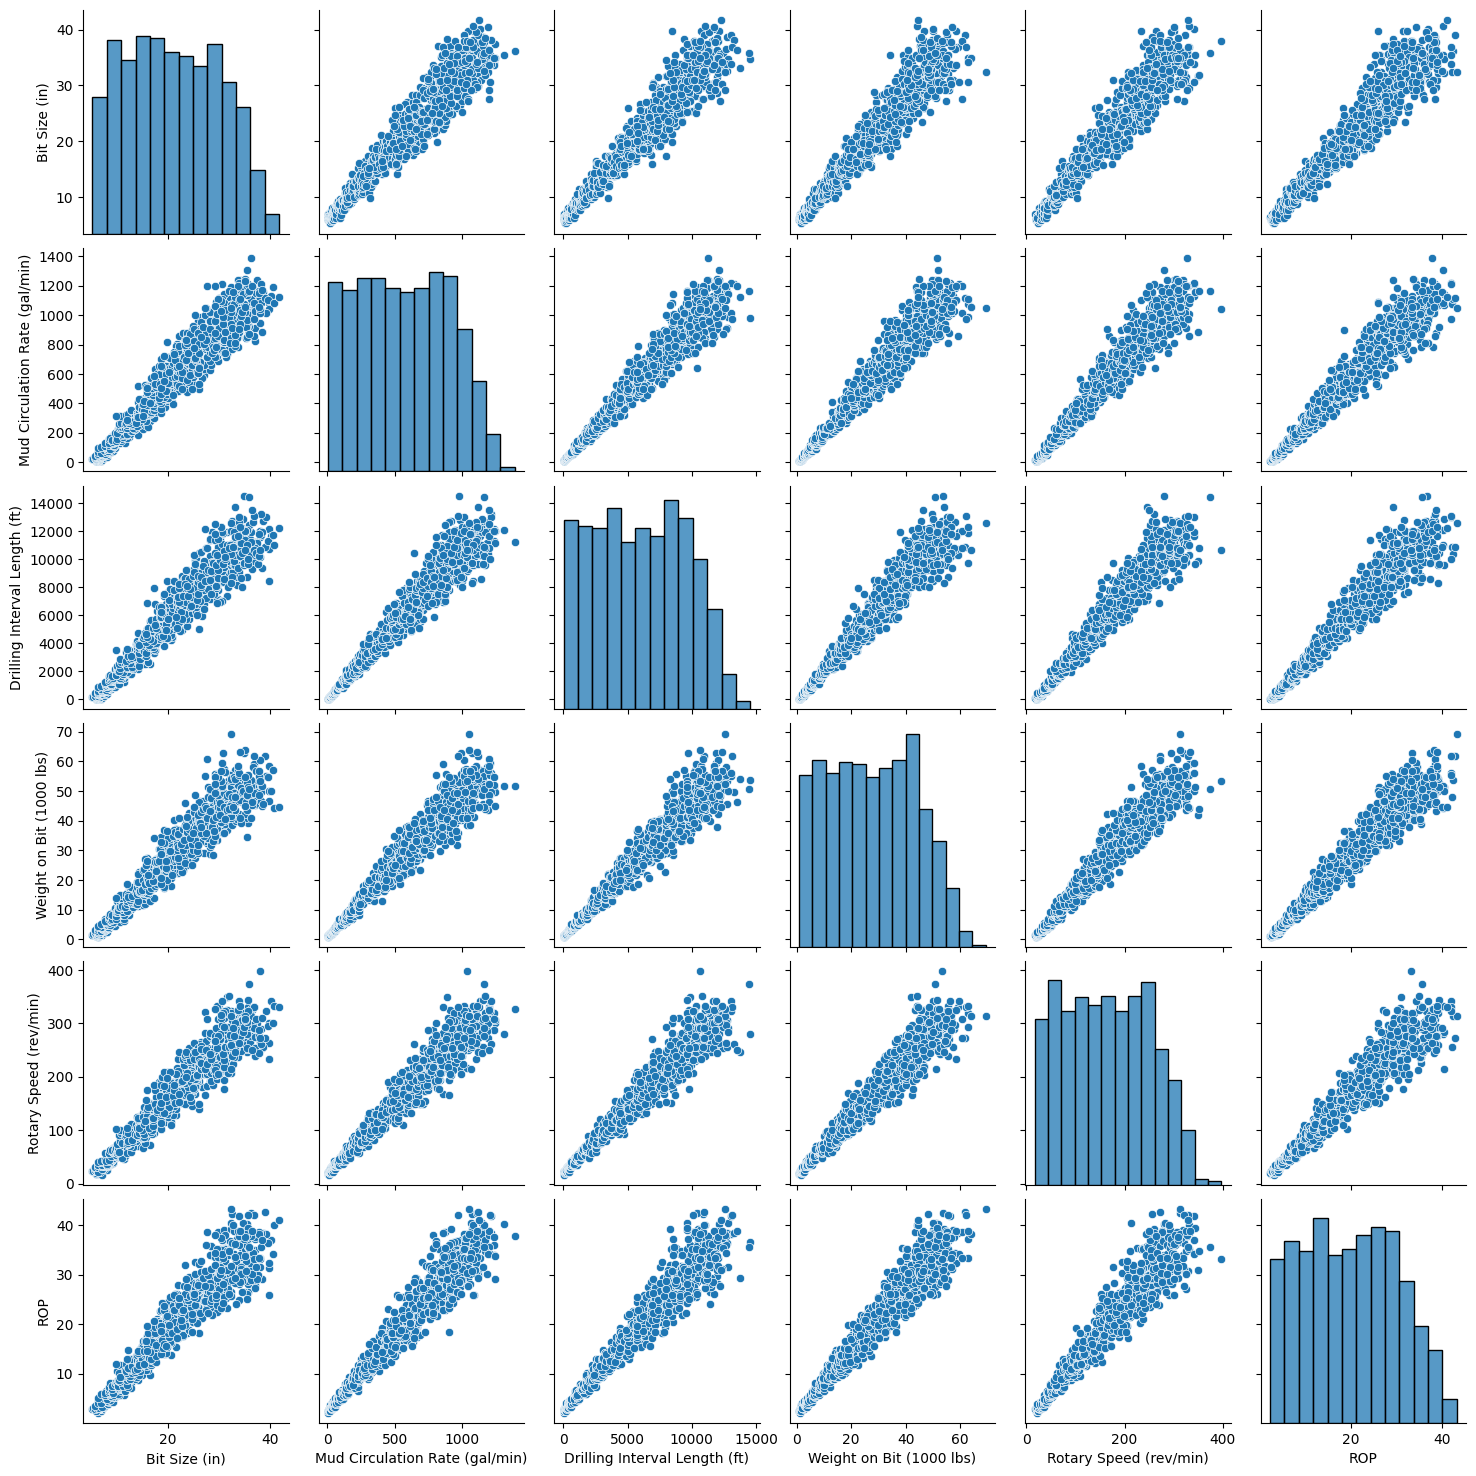

In [42]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df)
plt.show()






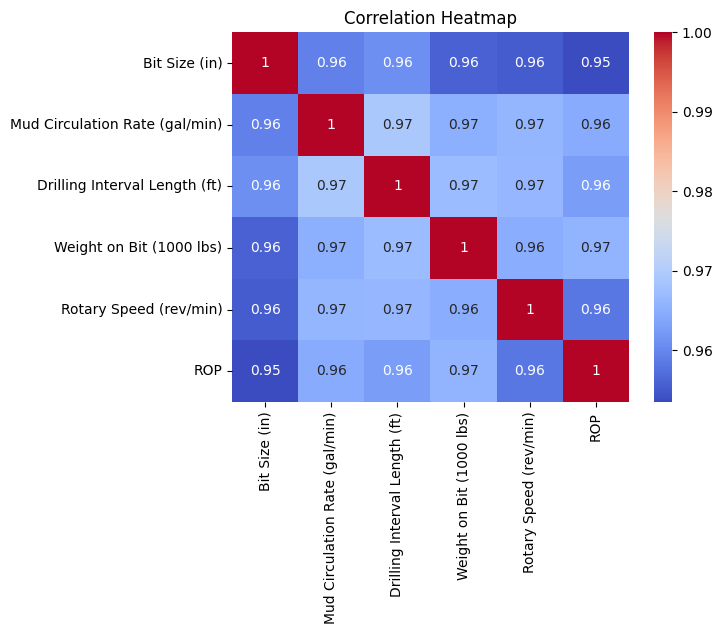

In [43]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()

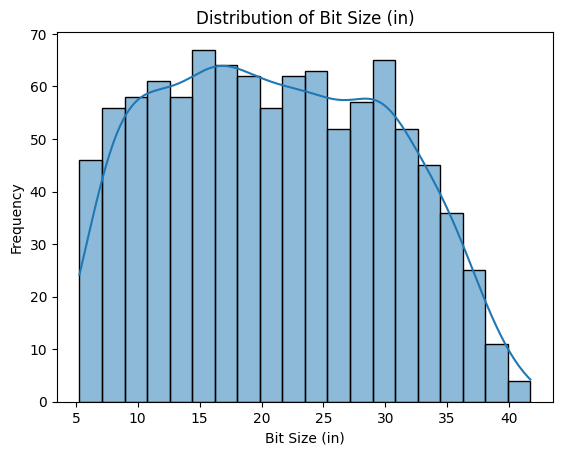

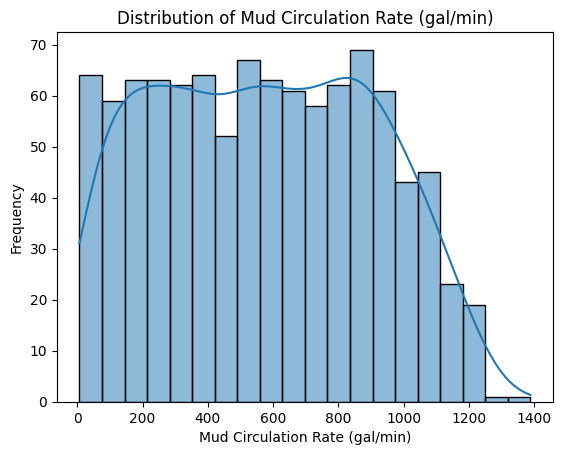

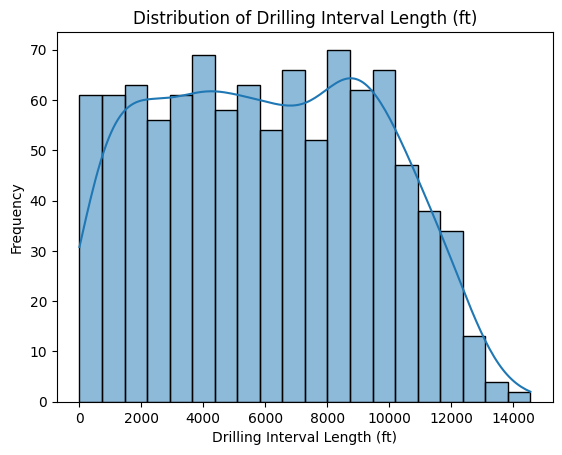

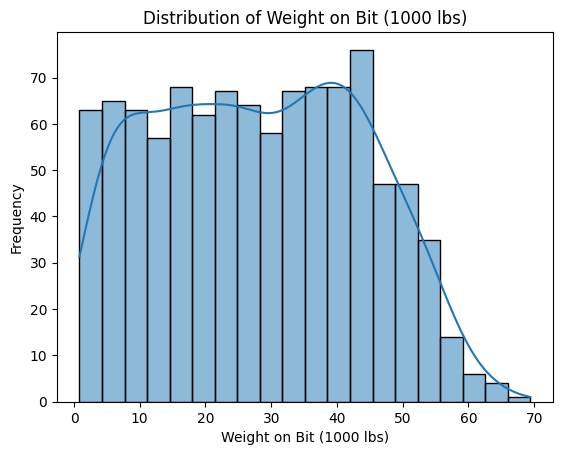

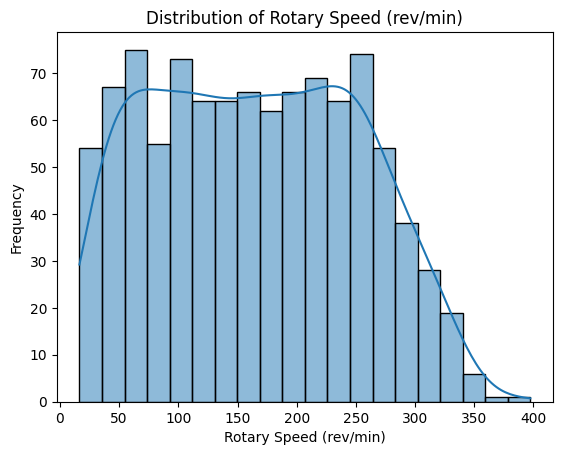

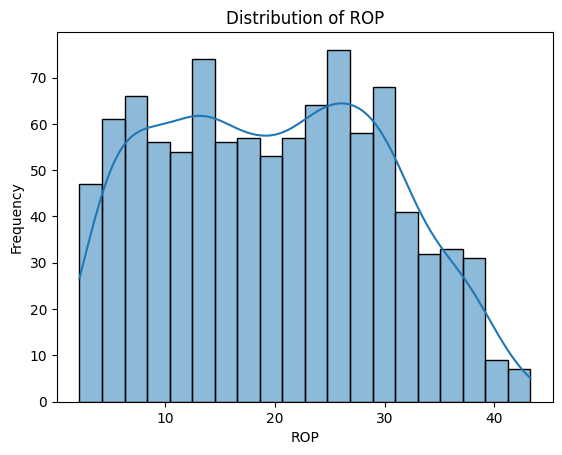

In [44]:
# Distribution plots for each feature
for column in df.columns:
    sns.histplot(df[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()


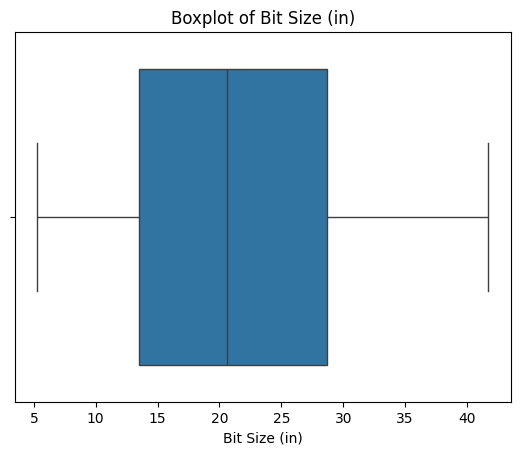

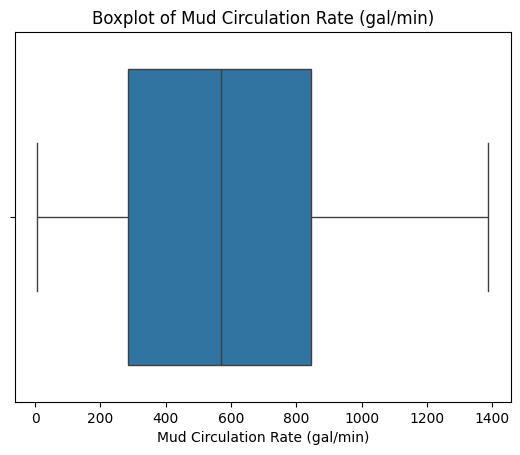

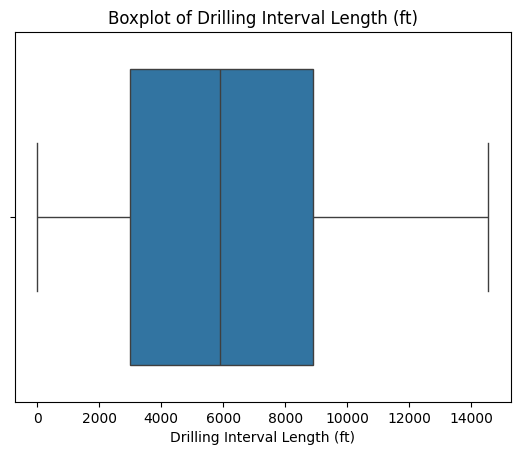

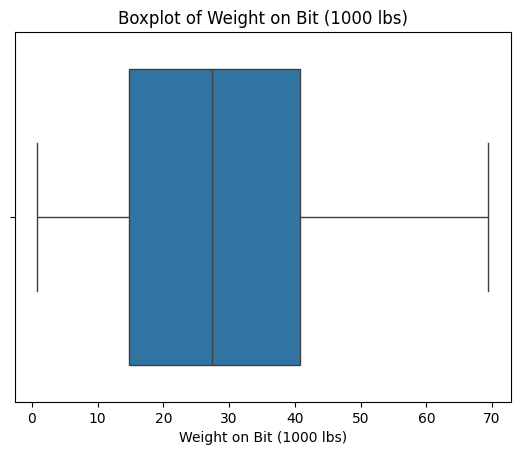

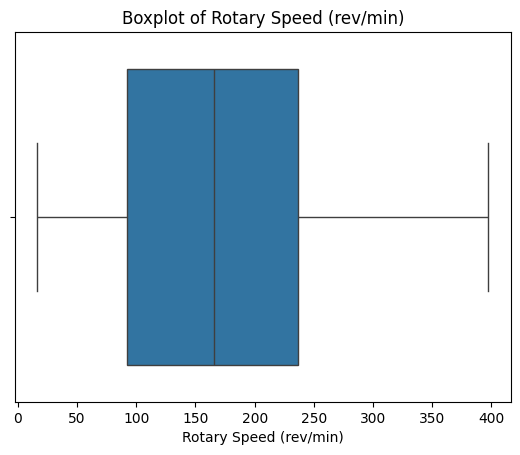

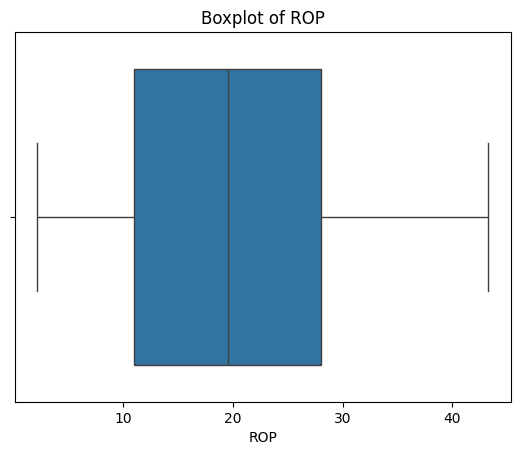

In [45]:
# Boxplot for each feature
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [47]:
# Ridge Regression
ridge_reg = Ridge(alpha=100.0)
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)
print("Ridge Regression R^2 score:", ridge_reg_r2)

Ridge Regression R^2 score: 0.8518759021775955


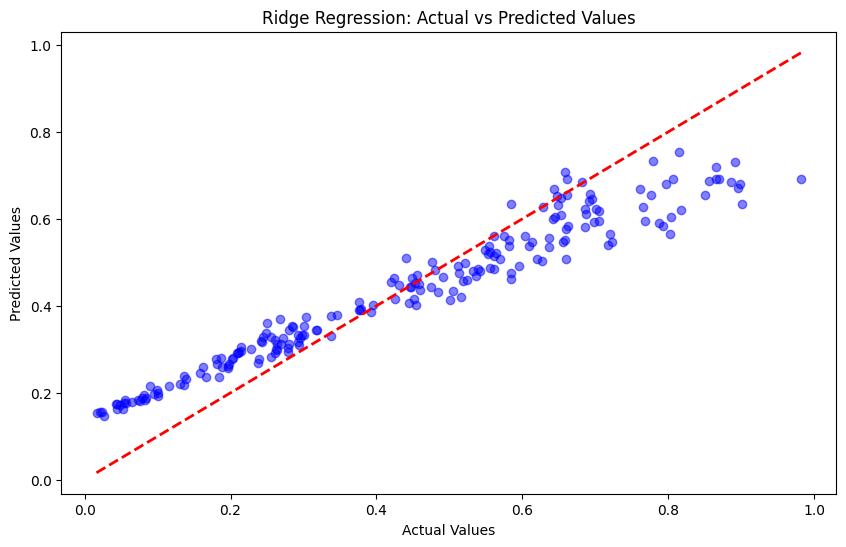

In [48]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_reg_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.savefig('Ridge Regression: Actual vs Predicted Values.png')
plt.show()


In [49]:
# Support Vector Regression (SVR)
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_r2 = r2_score(y_test, svr_pred)
print("SVR R^2 score:", svr_r2)

SVR R^2 score: 0.9499202323621595


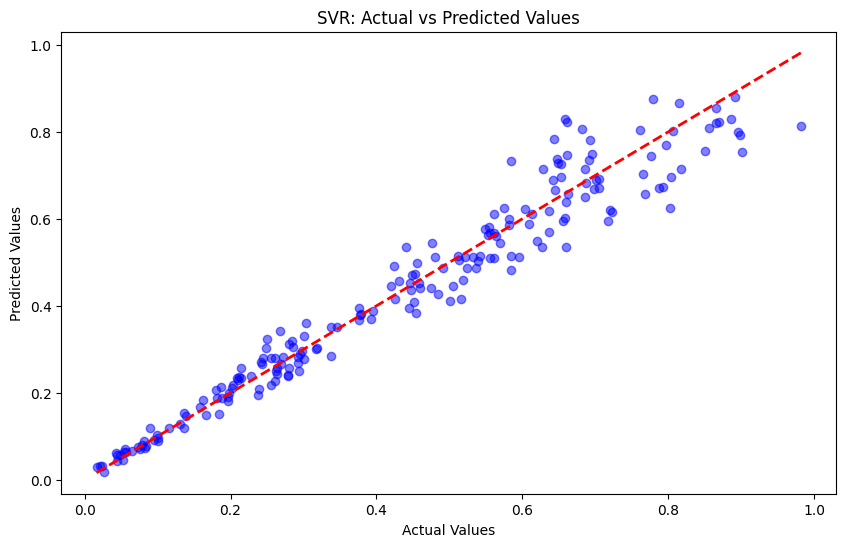

In [50]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.savefig('RSVR: Actual vs Predicted Values.png')
plt.show()


In [51]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_r2 = r2_score(y_test, random_forest_pred)
print("Random Forest R^2 score:", random_forest_r2)

Random Forest R^2 score: 0.9422691089655949


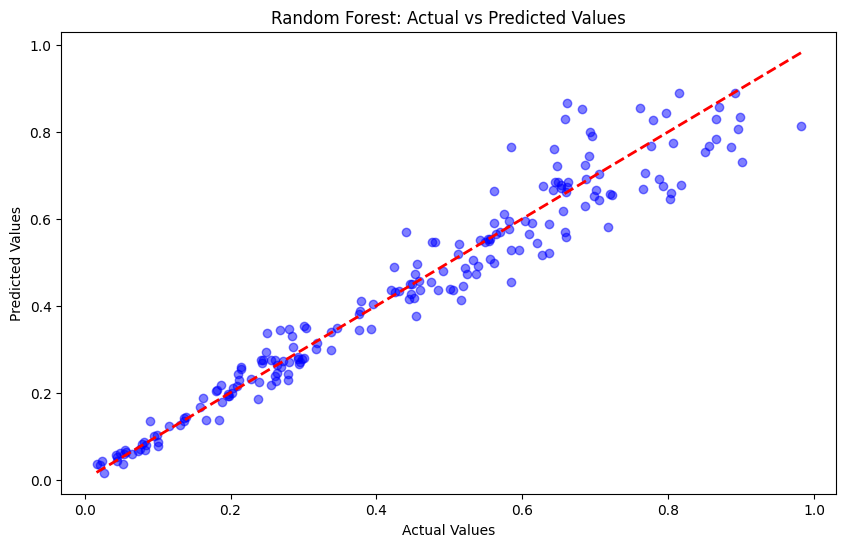

In [52]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.savefig('Random Forest: Actual vs Predicted Values.png')
plt.show()


In [53]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)
print("Gradient Boosting R^2 score:", gradient_boosting_r2)

Gradient Boosting R^2 score: 0.9390125127678239


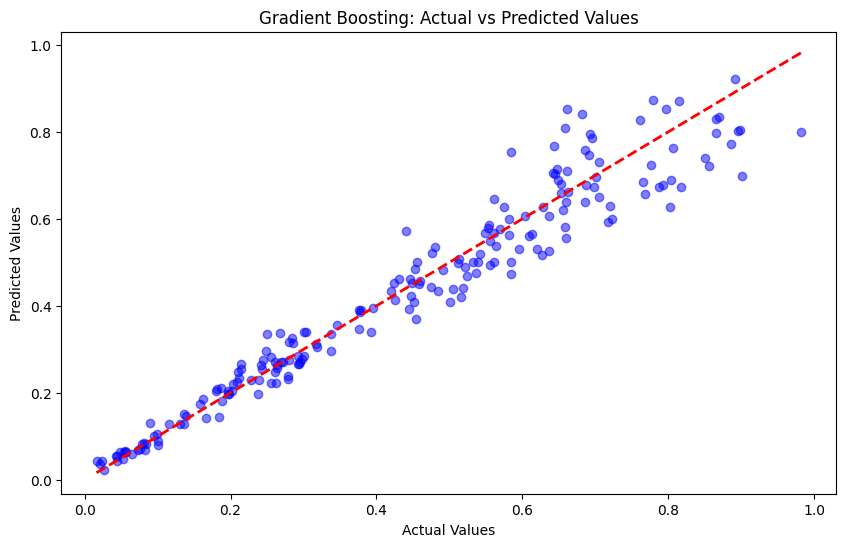

In [54]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gradient_boosting_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs Predicted Values')
plt.savefig('Gradient Boosting: Actual vs Predicted Values.png')
plt.show()


In [55]:
# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
print("KNN R^2 score:", knn_r2)

KNN R^2 score: 0.935471600938779


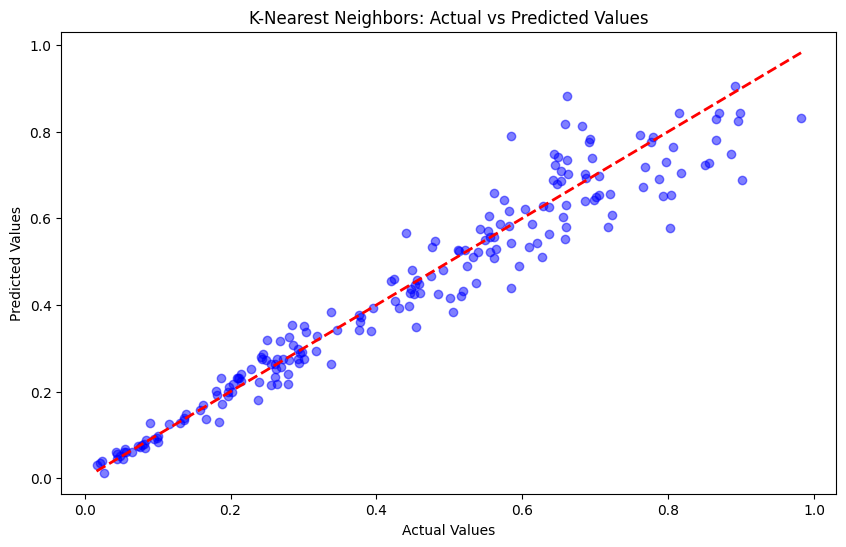

In [56]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors: Actual vs Predicted Values')
plt.savefig('K-Nearest Neighbors: Actual vs Predicted Values.png')
plt.show()



In [57]:
# Principal Component Regression (PCR) with Ridge Regression
pca = PCA(n_components=3)
ridge_pcr = make_pipeline(pca, Ridge())
ridge_pcr.fit(X_train, y_train)
ridge_pcr_pred = ridge_pcr.predict(X_test)
ridge_pcr_r2 = r2_score(y_test, ridge_pcr_pred)
print("PCR with Ridge Regression R^2 score:", ridge_pcr_r2)

PCR with Ridge Regression R^2 score: 0.9487076210070067


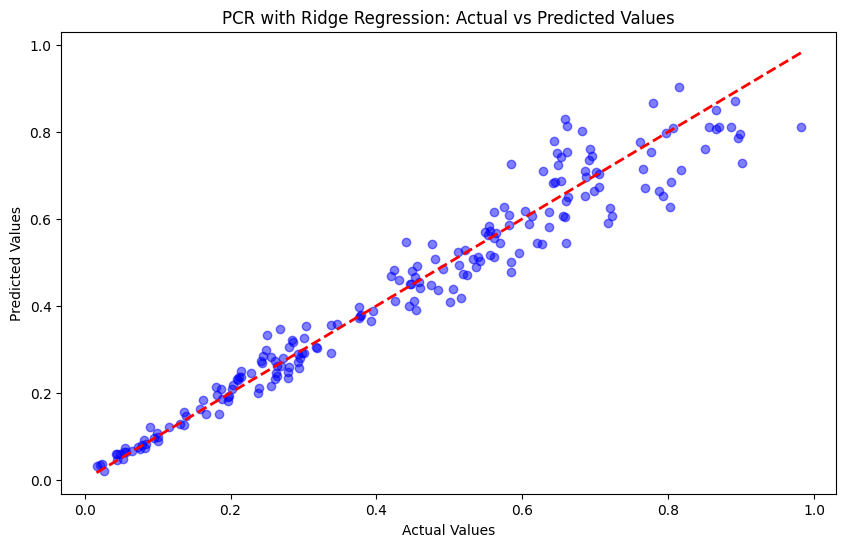

In [58]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pcr_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PCR with Ridge Regression: Actual vs Predicted Values')
plt.savefig('PCR with Ridge Regression: Actual vs Predicted Values.png')
plt.show()

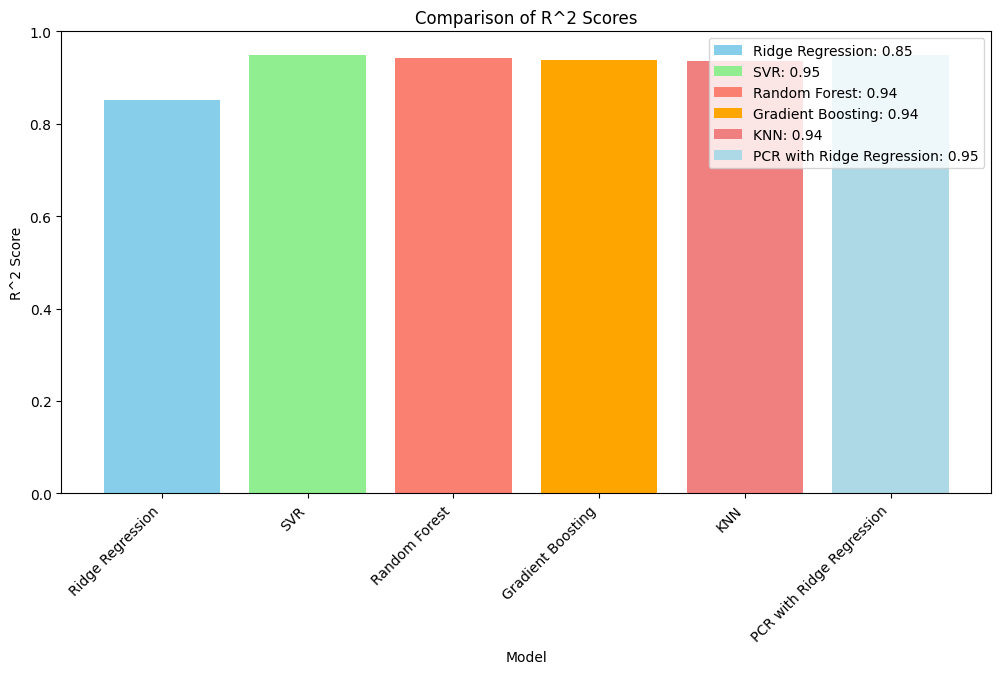

In [59]:
import matplotlib.pyplot as plt

# R^2 scores and corresponding colors
r2_scores = [ridge_reg_r2, svr_r2, random_forest_r2, gradient_boosting_r2, knn_r2, ridge_pcr_r2]
models = ['Ridge Regression', 'SVR', 'Random Forest', 'Gradient Boosting', 'KNN', 'PCR with Ridge Regression']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'lightblue']

# Plotting the R^2 scores
plt.figure(figsize=(12, 6))
bars = plt.bar(models, r2_scores, color=colors)
plt.ylim(0, 1)  # Limit y-axis to 0-1 as R^2 score ranges from 0 to 1
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores')

# Adding legend for colors
legend_labels = ['{}: {:.2f}'.format(model, score) for model, score in zip(models, r2_scores)]
plt.legend(bars, legend_labels)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [60]:
from tensorflow.python.keras.models import Sequential, load_model
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test data
neural_network_pred = model.predict(X_test)
neural_network_r2 = r2_score(y_test, neural_network_pred)
print("Neural Network R^2 score:", neural_network_r2)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.0655 - val_loss: 0.0215
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0190 - val_loss: 0.0041
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0155 - val_loss: 0.0045
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0030
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0082 - val_loss: 0.0030
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0035
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0030
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0030
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0032
Neural Network R^2 score: 0.9472006060779029


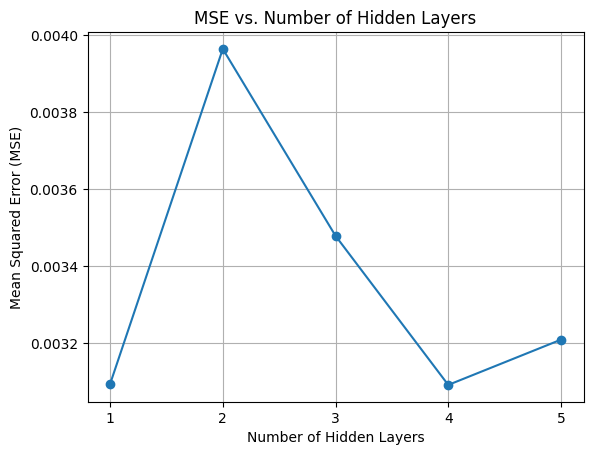

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define a function to create the Keras model with varying numbers of hidden layers
def create_model_with_hidden_layers(hidden_layers=1):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define a range of hidden layers to test
hidden_layers_range = range(1, 6)  # Testing from 1 to 5 hidden layers

# Train models with varying numbers of hidden layers and record their MSE scores
mse_scores = []
for hidden_layers in hidden_layers_range:
    model = create_model_with_hidden_layers(hidden_layers=hidden_layers)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot MSE scores against the number of hidden layers
plt.plot(hidden_layers_range, mse_scores, marker='o')
plt.title('MSE vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(hidden_layers_range)
plt.grid(True)
plt.show()


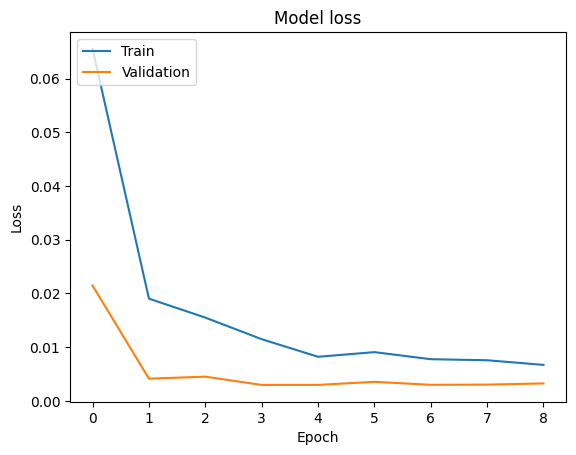

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.savefig('Model loss.png')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




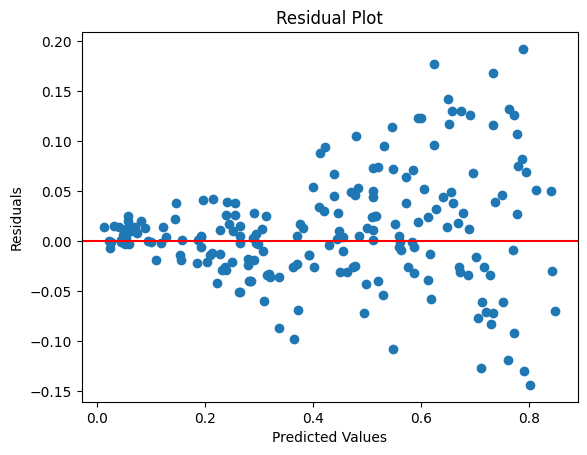

In [63]:
residuals = y_test - neural_network_pred.flatten()
plt.scatter(neural_network_pred.flatten(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('Residual Plot.png')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

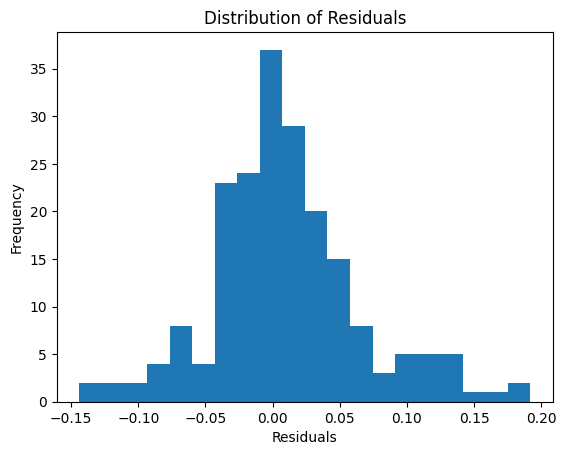

In [64]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.savefig('Distribution of Residuals.png')
plt.show()
